In [1]:
#Importamos librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carga de datos
data1 = pd.read_csv("./datasets/olist_marketing_qualified_leads_dataset.csv")
data1.head()


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [14]:
#Tamaño del dataset: 4 columnas y 8000 registros

data1.shape

(8000, 4)

In [3]:
#Verifico nulos y tipos de dato

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [15]:
data1.isnull().sum().sort_values()

mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64

In [4]:
#Vemos si hay filas duplicadas

data1.duplicated().sum()

0

In [16]:
#Valores extremos, rango de datos y outliers (relación de mediana y media).
data1.describe()

C:\Users\rigel\AppData\Local\Temp\ipykernel_26480\983232346.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data1.describe()


,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02 00:00:00,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296
first,NaN,2017-06-14 00:00:00,NaN,NaN
last,NaN,2018-05-31 00:00:00,NaN,NaN


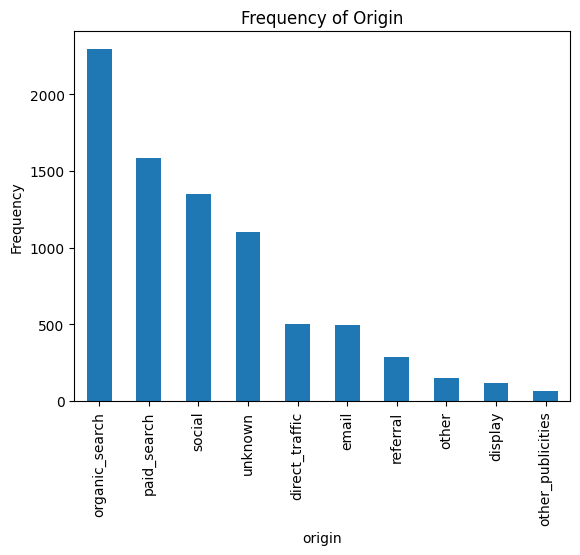

In [11]:
data1["origin"].value_counts().plot(kind='bar')
plt.xlabel("origin")
plt.ylabel("Frequency")
plt.title("Frequency of Origin")
plt.show()

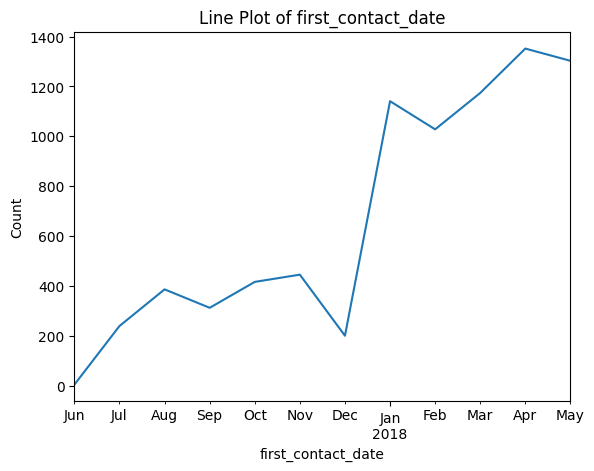

In [12]:
# convertir la columna "won_date" a un formato de fecha válido
data1['first_contact_date'] = pd.to_datetime(data1['first_contact_date'])

# Crear un gráfico de línea de la columna "won_date"
data1.set_index('first_contact_date').resample('M').size().plot(kind='line')
plt.xlabel("first_contact_date")
plt.ylabel("Count")
plt.title("Line Plot of first_contact_date")
plt.show()